In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter


In [14]:
participant_data = pd.read_csv("Demographics Information - Human Participants.csv")
print(participant_data.shape)
participant_data.head()

(175, 25)


,Study Name/Number,Race,Race Present,Ethnicity,Ethnicity Present,Study sample size,Sex Present,Male,Female,Unknown / Not Reported,...,Max Age,Country/Region,Location,Pre-existing conditions and/or Symptoms,Instruments used,Socioeconomic Status,Data Collected (differnent levels of),Date Study was Conducted/Published,Date Study Posted on PhysioNet,Field
0,A large scale 12-lead electrocardiogram databa...,X,0,X,0,"45, 152 patients",1,X,X,NaN,...,NaN,China,"Chapman University, Shaoxing People's Hospital...",Includes information about pre-existing condit...,GE MUSE ECG System,X,NaN,NaN,NaN,cardiac_electrophysiology
1,A multi-camera and multimodal dataset for post...,X,0,X,0,14,1,10,4,NaN,...,30.00,Portugal,Portugal (University of Minho),No clinical history of any abnormalities,MVN BIOMECH,X,"walking straight in a corridor, turning right ...",NaN,NaN,gait/balance/motion
2,A Pressure Map Dataset for In-bed Posture Clas...,X,0,X,0,Experiment 1: 13 participants Ex...,0,X,X,NaN,...,34.00,USA,Texas (University of Texas at Dallas),X,Experiment 1: Vista Medical FSA SoftFlex 2048 ...,X,in-bed posture pressure data,NaN,NaN,other
3,A Wearable Exam Stress Dataset for Predicting ...,X,0,X,0,10,0,X,X,NaN,...,NaN,USA,Texas (University of Houston,X,Empatica E4 wristband,NaN,"electrodermal activity, heart rate, blood vol...",NaN,NaN,multi_parameter
4,Abdominal and Direct Fetal ECG Database: Multi...,X,0,X,0,5 women in labor were analyzed,0,X,X,NaN,...,0.79,Poland,Department of Obstetrics at the Medical Univer...,Women in labor,"KOMPOREL System (ITAM Institute, Zabrze, Polan...",X,NaN,NaN,NaN,cardiac_electrophysiology


In [15]:
data = participant_data[['Race Present', 'Ethnicity Present', 'Sex Present', 'Age Present']]
data = data.rename(columns={"Race Present": "Race", "Ethnicity Present": "Ethn.", "Age Present": "Age", "Sex Present": "Gender"})
data.head()
sums = data.sum()
print(sums)


Race       10
Ethn.       6
Gender    131
Age       126
dtype: int64


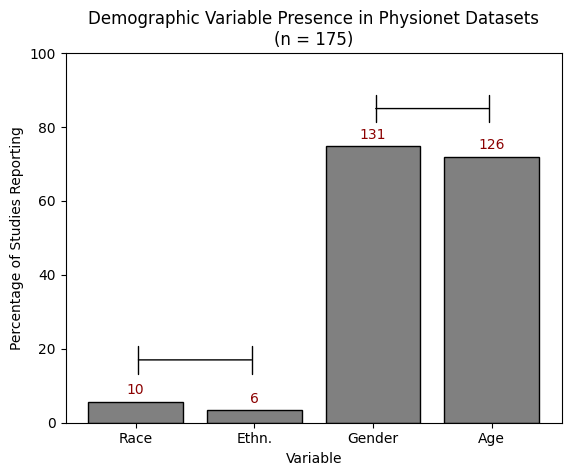

In [16]:
def addlabels(x,y,c):
    for i in range(len(x)):
        plt.text(i, y[i]+2, c[i], ha = 'center', color = 'darkred') # choose a color so the number above the bar is not confused witht he y axis labels

race = [5.71]
ethnicity = [3.43]
gender = [69.14]
age = [71.43]

simple = {'Race': sums[0]/1.75, 'Ethn.': sums[1]/1.75, 'Gender': sums[2]/1.75, 'Age': sums[3]/1.75}
vars = list(simple.keys())
values = list(simple.values())

fig, ax = plt.subplots()
plt.bar(vars, values, color = 'grey', edgecolor = 'black')
plt.title('Demographic Variable Presence in Physionet Datasets\n(n = 175)')
plt.ylabel("Percentage of Studies Reporting")
plt.xlabel("Variable")
plt.ylim(0, 100)

counts = [sums[0], sums[1], sums[2], sums[3]]
addlabels(vars, values, counts)

# plt.annotate('*', xy=(0, 25), ha='center', color='blue', fontsize=12, weight='bold')
# plt.annotate('*', xy=(1, 25), ha='center', color='blue', fontsize=12, weight='bold')
plt.annotate("", xy=(1, 17), xytext=(0, 17), arrowprops=dict(arrowstyle='|-|, widthB=1.0', lw=1.0, color = 'black'))

# plt.annotate('*', xy=(3, 90), ha='center', color='green', fontsize=12, weight='bold')
# plt.annotate('*', xy=(2, 90), ha='center', color='green', fontsize=12, weight='bold')
plt.annotate("", xy=(2, 85), xytext=(3, 85), arrowprops=dict(arrowstyle='|-|, widthB=1.0', lw=1.0, color = 'black'))

plt.show()


In [28]:
# age_data = pd.read_csv("Demographics Information - Age.csv")
age_data = participant_data[['Age Present', 'Average Age', 'Min Age', 'Max Age', 'Field']]
print(age_data.shape)
age_data.head()



(175, 5)


,Age Present,Average Age,Min Age,Max Age,Field
0,1,NaN,NaN,NaN,cardiac_electrophysiology
1,1,25.4,18.00,30.00,gait/balance/motion
2,1,26.9,19.00,34.00,other
3,0,NaN,NaN,NaN,multi_parameter
4,1,NaN,0.69,0.79,cardiac_electrophysiology


In [31]:
no_outlier = age_data.drop(age_data.index[123])
avg_age = age_data["Average Age"].dropna()
avg_age.head()
# print(avg_age.size)
print(avg_age.mean())

38.81789855072464


In [19]:
cleaned = age_data
## .dropna(subset=['Ma Age', 'Total N'])
min_age = cleaned["Min Age"].dropna()
min_age.head()
# print(min_age.size)
print(min_age.mean())

23.657282051276923


In [20]:
max_age = cleaned["Max Age"].dropna()
max_age.head()
# print(max_age.size)
# print(max_age.mean())

1    30.00
2    34.00
4     0.79
8    63.00
9    31.00
Name: Max Age, dtype: float64

In [21]:
maxAvg = cleaned.max(axis=0)['Average Age']
minAvg = cleaned.min(axis=0)['Average Age']
avgBins = (maxAvg-minAvg)
print(maxAvg, minAvg, avgBins)
print(cleaned['Average Age'].mean())

78.36 6.1 72.26
38.817898550724635


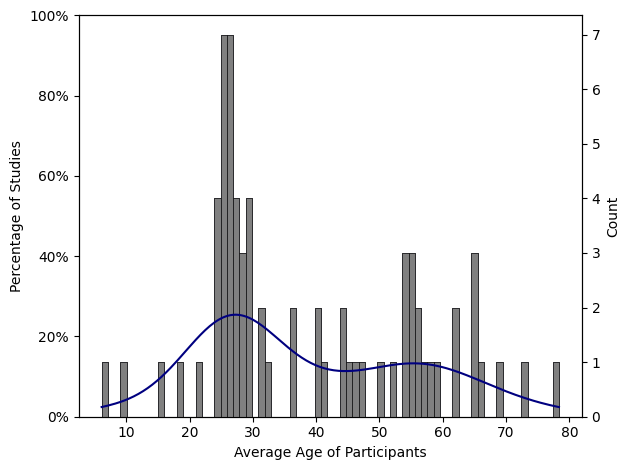

In [34]:
fig, ax = plt.subplots()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Average Age of Participants")
plt.ylabel("Percentage of Studies")
ax2 = ax.twinx()
sns.histplot(avg_age, kde=True, ax=ax2, bins = 73, color = 'navy')
plt.hist(avg_age, color = 'grey', bins = 73, edgecolor = 'black', linewidth = .4,)
plt.tight_layout()
plt.show()


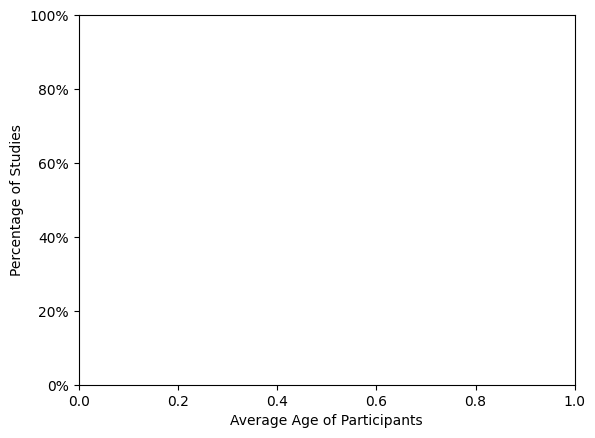

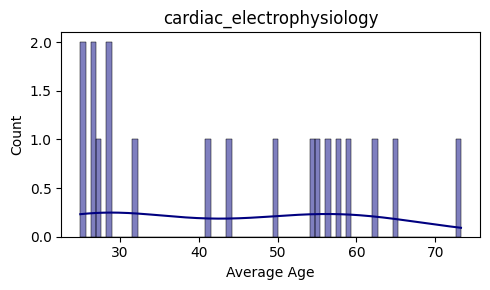

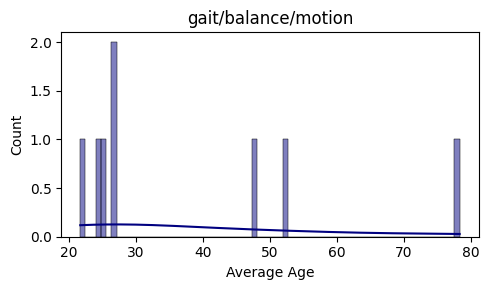

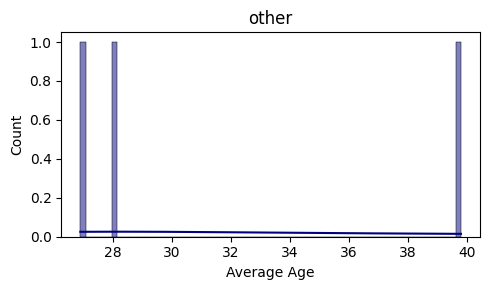

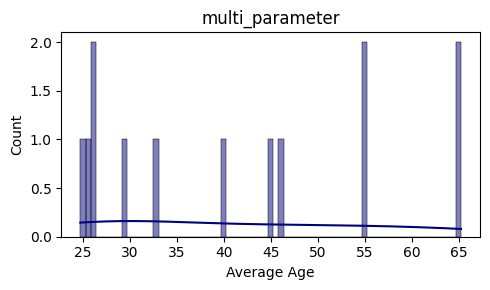

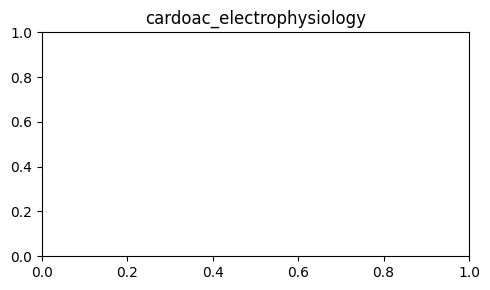

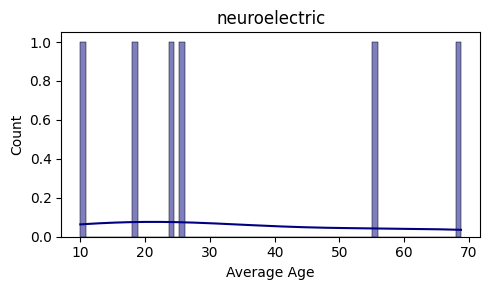

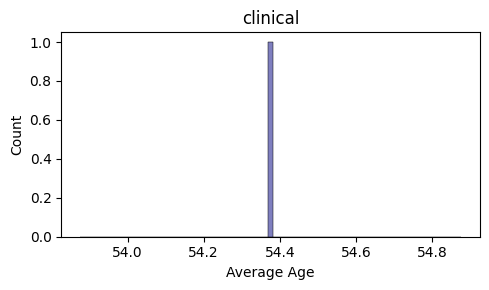

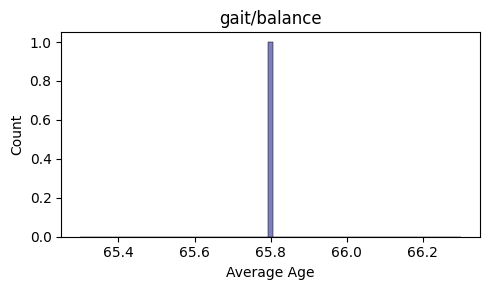

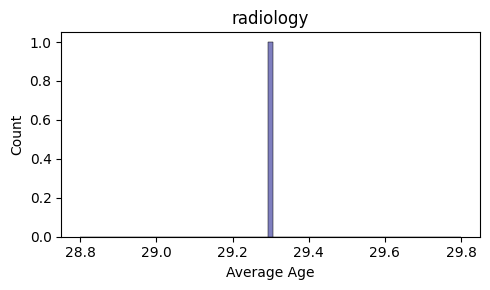

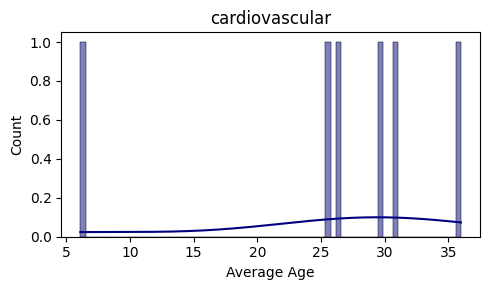

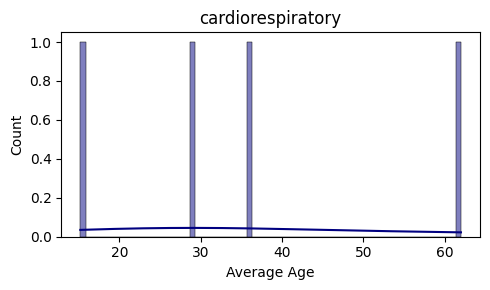

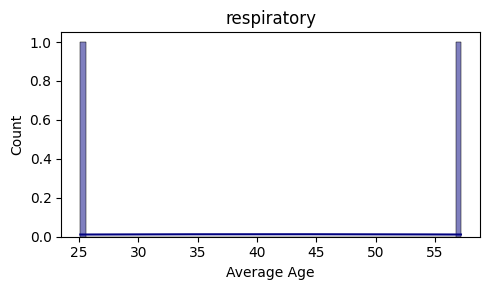

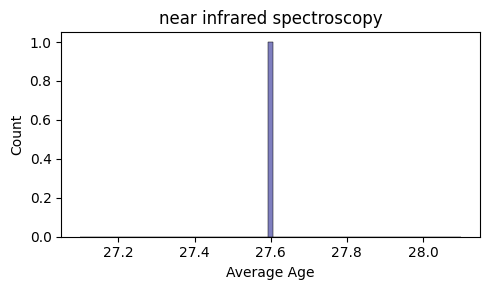

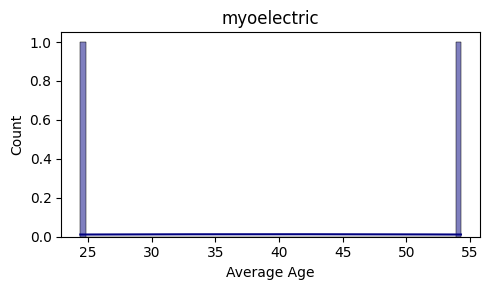

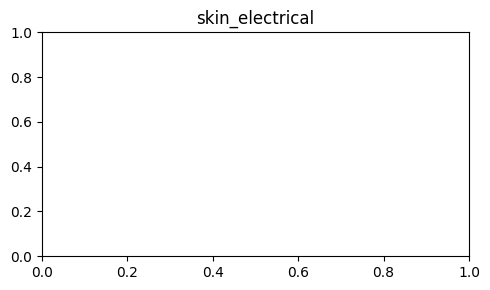

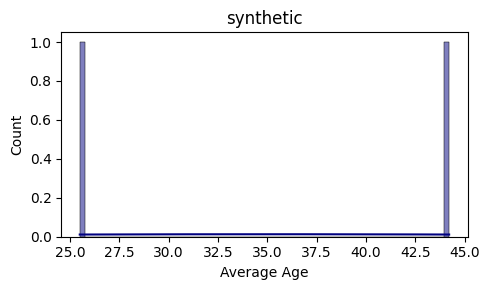

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Assuming you have the 'age_data' DataFrame containing the 'Average Age' and 'Field' columns

fields = age_data['Field'].unique()

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Average Age of Participants")
plt.ylabel("Percentage of Studies")

for f in fields:
    category_data = age_data[age_data['Field'] == f]
    
    # Set a smaller figure size here, for example, (6, 4) inches
    fig, ax = plt.subplots(figsize=(5, 3))
    
    sns.histplot(data=category_data, x='Average Age', kde=True, bins=73, color='navy')
    
    plt.title(f"{f}")
    
    plt.tight_layout()
    plt.show()


In [23]:
# print(cleaned[cleaned['Min Age'] == cleaned['Min Age'].max()])
# print(cleaned[cleaned['Min Age'] == cleaned['Min Age'].min()])

maxMin = cleaned.max(axis=0)['Min Age']
minMin = cleaned.min(axis=0)['Min Age']
minBins = (maxMin-minMin)
print(maxMin, minMin, minBins)

65.0 0.0 65.0


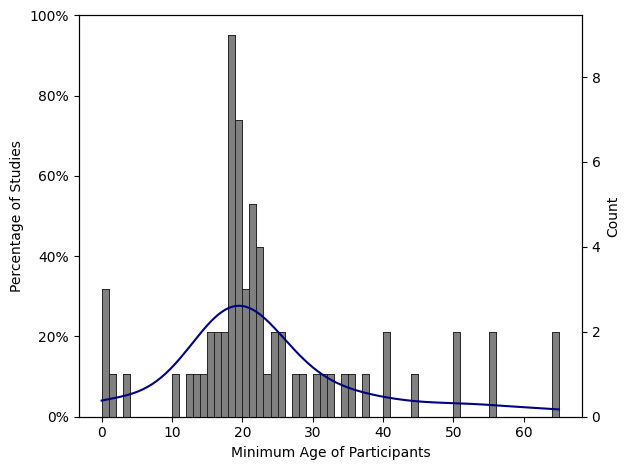

In [24]:
fig, ax = plt.subplots()
plt.xlabel("Minimum Age of Participants")
plt.ylabel("Percentage of Studies")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
ax2 = ax.twinx()
sns.histplot(min_age, kde = True, ax=ax2, bins = 65, color = 'navy')
plt.hist(min_age, color = 'grey', bins = 65, edgecolor = 'black', linewidth = .4)
plt.tight_layout()
plt.show()

In [26]:
# print(cleaned[cleaned['Ma Age'] == cleaned['Ma Age'].max()])
# print(cleaned[cleaned['Ma Age'] == cleaned['Ma Age'].min()])

maxMax = cleaned.max(axis=0)['Max Age']
minMax = cleaned.min(axis=0)['Max Age']
maxBins = (maxMax-minMax)
print(maxMax, minMax, maxBins)

99.1 0.79 98.30999999999999


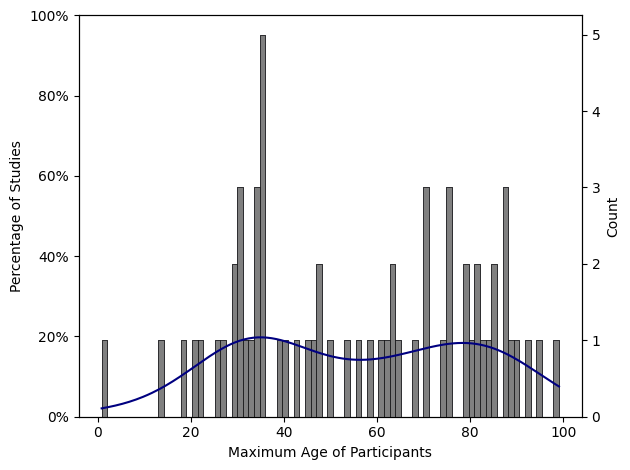

In [27]:
fig, ax = plt.subplots()
plt.xlabel("Maximum Age of Participants")
plt.ylabel("Percentage of Studies")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
ax2 = ax.twinx()
sns.histplot(max_age, ax=ax2, kde = True, bins = 81, color = 'navy')
plt.hist(max_age, color = 'grey', bins = 81, edgecolor = 'black', linewidth = .4)

plt.tight_layout()
plt.show()